In [ ]:
import torch
import torchvision
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from torchvision import transforms


from torchvision import datasets
from torch.utils.data import Subset

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# cd /content/drive/MyDrive/SnakeDataset

In [ ]:
root_dir = "C:/Users/noemi/Desktop/snake_dataset2"
train_path = root_dir + "/train"

In [ ]:
transform = transforms.Compose(
        [transforms.Resize([64, 64])])


train_set = torchvision.datasets.ImageFolder(train_path, transform=transform)

classes = ('Black_Rat_snake', 'Common_Garter_snake', 'DeKays_Brown_snake', 'Northern_Watersnake', 'Western_Diamondback_rattlesnake')

In [ ]:
# Dataset len
num_train = len(train_set)
print(f"Num. training samples: {num_train}")

Num. training samples: 17389


In [ ]:
sample, label = train_set[0]
print(sample)

<PIL.Image.Image image mode=RGB size=64x64 at 0x163C2FD01F0>


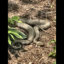

In [ ]:
sample

In [ ]:
classes[label]

'Black_Rat_snake'

In [ ]:
# List of indexes on the training set
train_idx = list(range(num_train))

In [ ]:
# Shuffle the training set
import random

random.shuffle(train_idx)
for i in range(10):
  print(train_idx[i])

6943
9663
8234
2826
11988
8072
10306
13170
12607
7979


In [ ]:
# Fraction of the original train set that we want to use as validation set
val_frac = 0.1
test_frac = 0.1
# Number of samples of the validation set
num_val = int(num_train * val_frac) 
num_test = int(num_train * test_frac) 
num_train = num_train - num_val - num_test

# Split training set
val_idx = train_idx[num_train: num_train + num_val]
test_idx = train_idx[num_train + num_val:]
train_idx = train_idx[:num_train]

print(f"{num_train} samples used as train set")
print(f"{num_val}  samples used as val set")
print(f"{num_test}  samples used as test set")

13913 samples used as train set
1738  samples used as val set
1738  samples used as test set


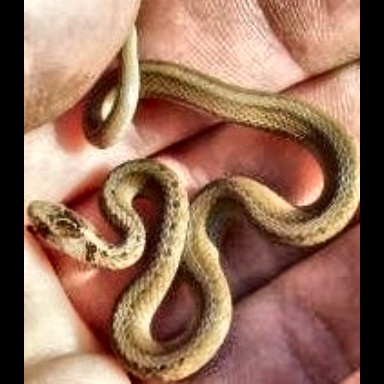

In [ ]:
# Load dataset with transforms
train_set = torchvision.datasets.ImageFolder(train_path)
val_set = Subset(train_set, val_idx)
test_set = Subset(train_set, test_idx)
train_set = Subset(train_set, train_idx)

# Define loaders
from torch.utils.data import DataLoader
train_loader = DataLoader(train_set, batch_size=64, num_workers=0, shuffle=True)
val_loader   = DataLoader(val_set,   batch_size=64, num_workers=0, shuffle=False)
test_loader  = DataLoader(test_set,  batch_size=64, num_workers=0, shuffle=False)
sample, label = train_set[0]
sample


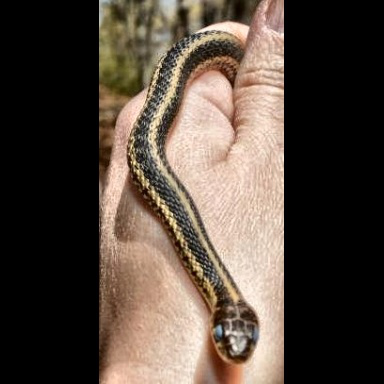

In [ ]:
sampleval, labelval = val_set[0]
sampleval

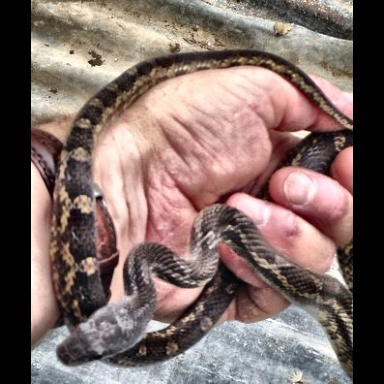

In [ ]:
sampletest, labeltest = test_set[0]
sampletest

In [ ]:
from torchvision import transforms

# Compose transformations
data_transform = transforms.Compose([
  transforms.Resize([28,28]),
  transforms.ToTensor(),
  transforms.Normalize(0.5, 0.5)
])

# Load dataset with transforms
train_set = torchvision.datasets.ImageFolder(train_path, transform=data_transform)

In [ ]:
# Split train_dataset into training and validation and into training and test
from torch.utils.data import Subset

val_set = Subset(train_set, val_idx)
test_set = Subset(train_set, test_idx)
train_set = Subset(train_set, train_idx)


In [ ]:
# Define loaders
from torch.utils.data import DataLoader
train_loader = DataLoader(train_set, batch_size=64, num_workers=0, shuffle=True)
val_loader   = DataLoader(val_set,   batch_size=64, num_workers=0, shuffle=False)
test_loader  = DataLoader(test_set,  batch_size=64, num_workers=0, shuffle=False)

In [ ]:
import torch.nn as nn

class SimpleCNN(nn.Module):

  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        # Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 3
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 4
        nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 5
        nn.Conv2d(in_channels=512, out_channels=512, kernel_size=1, padding=0, stride=1),
        nn.ReLU(),
        nn.AdaptiveMaxPool2d(output_size=2),
        # Classifier
        nn.Conv2d(in_channels=512, out_channels=10, kernel_size=2, padding=0, stride=1)
    )

  # Forward
  def forward(self, x):
    #input is B x 1 x 28 x 28
    x = self.conv_layer(x)
    return x

In [ ]:
# Create the model
mymodel = SimpleCNN()
print(mymodel)

SimpleCNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(512, 512, kernel_size=(1, 1), stride=(1, 1))
    (12): ReLU()
    (13): AdaptiveMaxPool2d(output_size=2)
    (14): Conv2d(512, 10, kernel_size=(2, 2), stride=(1, 1))
  )
)


In [ ]:
# Get an element from the dataset
test_x, _ = train_set[0] 

In [ ]:
# Get the size of a sample
test_x.size()

torch.Size([3, 28, 28])

In [ ]:
test_x = test_x.unsqueeze(dim=0)
test_x.size()

torch.Size([1, 3, 28, 28])

In [ ]:
output = mymodel(test_x)
output.shape

torch.Size([1, 10, 1, 1])

In [ ]:
out_features = output.size(1) * output.size(2) * output.size(3)
print(out_features)

10


In [ ]:
class CNN(nn.Module):
  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        # Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 3
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 4
        nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 5
        nn.Conv2d(in_channels=512, out_channels=512, kernel_size=1, padding=0, stride=1),
        nn.ReLU(),
        nn.AdaptiveMaxPool2d(output_size=2),
        # Classifier
        nn.Conv2d(in_channels=512, out_channels=10, kernel_size=2, padding=0, stride=1)
    )
    # Create fully-connected layers
    self.fc_layers = nn.Sequential(
        # a first FC layer
        nn.Linear(10, 1024),
        nn.ReLU(),
        # the final Classification Layer
        nn.Linear(1024, 10)
     )
  # Forward
  def forward(self, x):
    x = self.conv_layer(x) 
    x = x.view(x.size(0), -1) 
    output = self.fc_layers(x) 
    return output

In [ ]:
# Create the model
mymodel_0 = CNN()
print(mymodel_0)
output = mymodel_0(test_x)
output.shape

CNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(512, 512, kernel_size=(1, 1), stride=(1, 1))
    (12): ReLU()
    (13): AdaptiveMaxPool2d(output_size=2)
    (14): Conv2d(512, 10, kernel_size=(2, 2), stride=(1, 1))
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=10, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=10, bias=True)
  )
)


torch.Size([1, 10])

In [ ]:
torch.cuda.is_available()

True

In [ ]:
dev = torch.device('cuda')
print(dev)

cuda


In [ ]:
#Define an optimizier
import torch.optim as optim
optimizer = optim.SGD(mymodel_0.parameters(), lr = 0.01)
# Define a loss 
criterion = nn.CrossEntropyLoss()

In [ ]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
def train(net, loaders, optimizer, criterion, epochs=100, dev=torch.device("cuda"), save_param = False, model_name="my_model"):
    try:
        net = net.to(dev)
       
        
        # Initialize history
        history_loss = {"train": [], "val": [], "test": []}
        history_accuracy = {"train": [], "val": [], "test": []}
        # Store the best val accuracy
        best_val_accuracy = 0

        # Process each epoch
        for epoch in range(epochs):
            # Initialize epoch variables
            sum_loss = {"train": 0, "val": 0, "test": 0}
            sum_accuracy = {"train": 0, "val": 0, "test": 0}
            # Process each split
            for split in ["train", "val", "test"]:
                if split == "train":
                  net.train()
                else:
                  net.eval()
                # Process each batch
                for (input, labels) in tqdm(loaders[split],desc=split):
                    # Move to CUDA
                    input = input.to(dev)
                    labels = labels.to(dev)
                    # Reset gradients
                    optimizer.zero_grad()
                    # Compute output
                    pred = net(input)
                    loss = criterion(pred, labels)
                    # Update loss
                    sum_loss[split] += loss.item()
                    # Check parameter update
                    if split == "train":
                        # Compute gradients
                        loss.backward()
                        # Optimize
                        optimizer.step()
                    # Compute accuracy
                    _,pred_labels = pred.max(1)
                    batch_accuracy = (pred_labels == labels).sum().item()/input.size(0)
                    # Update accuracy
                    sum_accuracy[split] += batch_accuracy
            # Compute epoch loss/accuracy
            epoch_loss = {split: sum_loss[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            epoch_accuracy = {split: sum_accuracy[split]/len(loaders[split]) for split in ["train", "val", "test"]}

            # Store params at the best validation accuracy
            if save_param and epoch_accuracy["val"] > best_val_accuracy:
              #torch.save(net.state_dict(), f"{net.__class__.__name__}_best_val.pth")
              torch.save(net.state_dict(), f"{model_name}_best_val.pth")
              best_val_accuracy = epoch_accuracy["val"]

            # Update history
            for split in ["train", "val", "test"]:
                history_loss[split].append(epoch_loss[split])
                history_accuracy[split].append(epoch_accuracy[split])
            # Print info
            print(f"Epoch {epoch+1}:",
                  f"TrL={epoch_loss['train']:.4f},",
                  f"TrA={epoch_accuracy['train']:.4f},",
                  f"VL={epoch_loss['val']:.4f},",
                  f"VA={epoch_accuracy['val']:.4f},",
                  f"TeL={epoch_loss['test']:.4f},",
                  f"TeA={epoch_accuracy['test']:.4f},")
    except KeyboardInterrupt:
        print("Interrupted")
    finally:
        # Plot loss
        plt.title("Loss")
        for split in ["train", "val", "test"]:
            plt.plot(history_loss[split], label=split)
        plt.legend()
        plt.show()
        # Plot accuracy
        plt.title("Accuracy")
        for split in ["train", "val", "test"]:
            plt.plot(history_accuracy[split], label=split)
        plt.legend()
        plt.show()
        print('list of accuracy',history_accuracy)
        print('list of predictions',pred)
        #plt.plot('neurnet',net)
        #print('Neural network',net)

In [ ]:
# Define dictionary of loaders
loaders = {"train": train_loader,   
           "val": val_loader,
           "test": test_loader}

train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 1: TrL=1.8005, TrA=0.2055, VL=1.6684, VA=0.2125, TeL=1.6684, TeA=0.2017,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 2: TrL=1.6469, TrA=0.2093, VL=1.6345, VA=0.2093, TeL=1.6375, TeA=0.1975,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 3: TrL=1.6264, TrA=0.2155, VL=1.6219, VA=0.2114, TeL=1.6202, TeA=0.2047,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 4: TrL=1.6174, TrA=0.2157, VL=1.6145, VA=0.2121, TeL=1.6164, TeA=0.1998,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 5: TrL=1.6128, TrA=0.2172, VL=1.6118, VA=0.2097, TeL=1.6142, TeA=0.1983,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 6: TrL=1.6095, TrA=0.2221, VL=1.6122, VA=0.2171, TeL=1.6118, TeA=0.2117,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 7: TrL=1.6085, TrA=0.2206, VL=1.6071, VA=0.2422, TeL=1.6077, TeA=0.2343,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 8: TrL=1.6049, TrA=0.2323, VL=1.6048, VA=0.2557, TeL=1.6060, TeA=0.2359,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 9: TrL=1.5990, TrA=0.2471, VL=1.5972, VA=0.2165, TeL=1.5944, TeA=0.2479,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 10: TrL=1.5871, TrA=0.2569, VL=1.5828, VA=0.2651, TeL=1.5757, TeA=0.2831,


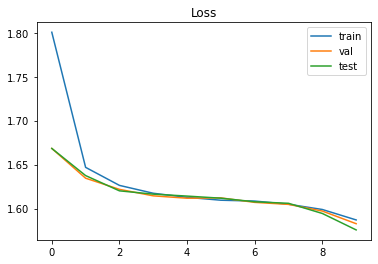

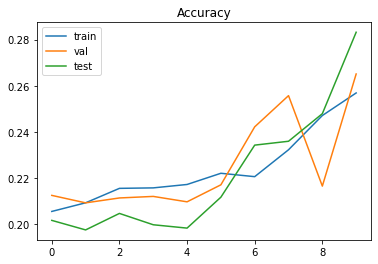

list of accuracy {'train': [0.2055475917431193, 0.20928325688073396, 0.21554185779816512, 0.21574827981651376, 0.21722190366972477, 0.22207282110091744, 0.22060779816513762, 0.23225057339449542, 0.24707855504587153, 0.2568577981651376], 'val': [0.2125, 0.20926339285714285, 0.21138392857142857, 0.21205357142857142, 0.20970982142857145, 0.21707589285714285, 0.2421875, 0.2556919642857143, 0.21651785714285715, 0.2650669642857143], 'test': [0.20167410714285713, 0.19754464285714285, 0.2046875, 0.19977678571428573, 0.19832589285714283, 0.21171874999999998, 0.23426339285714287, 0.2359375, 0.24787946428571428, 0.2831473214285714]}
list of predictions tensor([[ 3.3735,  3.1840,  3.2448,  3.7370,  3.9417, -3.5453, -3.6898, -3.5396,
         -3.7103, -3.5754],
        [ 3.8229,  3.6841,  3.8721,  4.0991,  3.6602, -3.8758, -3.9260, -3.8408,
         -4.0071, -3.9407],
        [ 4.0031,  3.8154,  4.0487,  4.4037,  3.8802, -4.0844, -4.1573, -4.0283,
         -4.2320, -4.1456],
        [ 3.3262,  3.21

In [ ]:
# Train model
train(mymodel_0, loaders, optimizer, criterion, epochs=10, dev=dev)

In [ ]:
print(mymodel_0)

CNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(512, 512, kernel_size=(1, 1), stride=(1, 1))
    (12): ReLU()
    (13): AdaptiveMaxPool2d(output_size=2)
    (14): Conv2d(512, 10, kernel_size=(2, 2), stride=(1, 1))
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=10, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=10, bias=True)
  )
)


In [ ]:
from torchsummary import summary

# summary(your_model, input_size=(channels, H, W))
summary(mymodel_0, (3,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 26, 26]           1,792
              ReLU-2           [-1, 64, 26, 26]               0
            Conv2d-3          [-1, 128, 24, 24]          73,856
              ReLU-4          [-1, 128, 24, 24]               0
         MaxPool2d-5          [-1, 128, 12, 12]               0
            Conv2d-6          [-1, 256, 10, 10]         295,168
              ReLU-7          [-1, 256, 10, 10]               0
         MaxPool2d-8            [-1, 256, 5, 5]               0
            Conv2d-9            [-1, 512, 3, 3]       1,180,160
             ReLU-10            [-1, 512, 3, 3]               0
        MaxPool2d-11            [-1, 512, 1, 1]               0
           Conv2d-12            [-1, 512, 1, 1]         262,656
             ReLU-13            [-1, 512, 1, 1]               0
AdaptiveMaxPool2d-14            [-1, 51

In [ ]:
for name, param in mymodel_0.named_parameters():
    print(name, param.shape)

conv_layer.0.weight torch.Size([64, 3, 3, 3])
conv_layer.0.bias torch.Size([64])
conv_layer.2.weight torch.Size([128, 64, 3, 3])
conv_layer.2.bias torch.Size([128])
conv_layer.5.weight torch.Size([256, 128, 3, 3])
conv_layer.5.bias torch.Size([256])
conv_layer.8.weight torch.Size([512, 256, 3, 3])
conv_layer.8.bias torch.Size([512])
conv_layer.11.weight torch.Size([512, 512, 1, 1])
conv_layer.11.bias torch.Size([512])
conv_layer.14.weight torch.Size([10, 512, 2, 2])
conv_layer.14.bias torch.Size([10])
fc_layers.0.weight torch.Size([1024, 10])
fc_layers.0.bias torch.Size([1024])
fc_layers.2.weight torch.Size([10, 1024])
fc_layers.2.bias torch.Size([10])


In [ ]:
# define a function for counting the parameters of a model
def count_parameters(mymodel_0):
    return sum(p.numel() for p in mymodel_0.parameters() )

In [ ]:
count_parameters(mymodel_0)

1855636

In [ ]:
import torch.nn as nn

class SimpleCNN_1(nn.Module):

  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        # Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 3
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 4
        nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.AdaptiveMaxPool2d(output_size=2),
        # Classifier
        nn.Conv2d(in_channels=512, out_channels=10, kernel_size=2, padding=0, stride=1)
    )

  # Forward
  def forward(self, x):
    #input is B x 1 x 28 x 28
    x = self.conv_layer(x)
    return x

In [ ]:
# Create the model
mymodel = SimpleCNN_1()
print(mymodel)

SimpleCNN_1(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): AdaptiveMaxPool2d(output_size=2)
    (11): Conv2d(512, 10, kernel_size=(2, 2), stride=(1, 1))
  )
)


In [ ]:
# Get an element from the dataset
test_x, _ = train_set[0] 

In [ ]:
# Get the size of a sample
test_x.size()

torch.Size([3, 28, 28])

In [ ]:
test_x = test_x.unsqueeze(dim=0)
test_x.size()

torch.Size([1, 3, 28, 28])

In [ ]:
output = mymodel(test_x)
output.shape

torch.Size([1, 10, 1, 1])

In [ ]:
out_features = output.size(1) * output.size(2) * output.size(3)
print(out_features)

10


In [ ]:
 class CNN_1(nn.Module):
  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        # Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 3
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 4
        nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.AdaptiveMaxPool2d(output_size=2),
        # Classifier
        nn.Conv2d(in_channels=512, out_channels=10, kernel_size=2, padding=0, stride=1)
    )
       
       
    # Create fully-connected layers
    self.fc_layers = nn.Sequential(
        # a first FC layer
        nn.Linear(10, 1024), 
        nn.ReLU(),
        # the final Classification Layer
        nn.Linear(1024, 10)
     )
  # Forward
  def forward(self, x):
    x = self.conv_layer(x) 
    x = x.view(x.size(0), -1) 
    output = self.fc_layers(x) 
    return output

In [ ]:
# Create the model
mymodel_1 = CNN_1()
print(mymodel_1)
output = mymodel_1(test_x)
output.shape

CNN_1(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): AdaptiveMaxPool2d(output_size=2)
    (11): Conv2d(512, 10, kernel_size=(2, 2), stride=(1, 1))
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=10, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=10, bias=True)
  )
)


torch.Size([1, 10])

In [ ]:
#Define an optimizier
import torch.optim as optim
optimizer = optim.SGD(mymodel_1.parameters(), lr = 0.01)
# Define a loss 
criterion = nn.CrossEntropyLoss()

In [ ]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
def train(net, loaders, optimizer, criterion, epochs=100, dev=torch.device("cuda"), save_param = False, model_name="my_model_1"):
    try:
        net = net.to(dev)
       
        
        # Initialize history
        history_loss = {"train": [], "val": [], "test": []}
        history_accuracy = {"train": [], "val": [], "test": []}
        # Store the best val accuracy
        best_val_accuracy = 0

        # Process each epoch
        for epoch in range(epochs):
            # Initialize epoch variables
            sum_loss = {"train": 0, "val": 0, "test": 0}
            sum_accuracy = {"train": 0, "val": 0, "test": 0}
            # Process each split
            for split in ["train", "val", "test"]:
                if split == "train":
                  net.train()
                else:
                  net.eval()
                # Process each batch
                for (input, labels) in tqdm(loaders[split],desc=split):
                    # Move to CUDA
                    input = input.to(dev)
                    labels = labels.to(dev)
                    # Reset gradients
                    optimizer.zero_grad()
                    # Compute output
                    pred = net(input)
                    loss = criterion(pred, labels)
                    # Update loss
                    sum_loss[split] += loss.item()
                    # Check parameter update
                    if split == "train":
                        # Compute gradients
                        loss.backward()
                        # Optimize
                        optimizer.step()
                    # Compute accuracy
                    _,pred_labels = pred.max(1)
                    batch_accuracy = (pred_labels == labels).sum().item()/input.size(0)
                    # Update accuracy
                    sum_accuracy[split] += batch_accuracy
            # Compute epoch loss/accuracy
            epoch_loss = {split: sum_loss[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            epoch_accuracy = {split: sum_accuracy[split]/len(loaders[split]) for split in ["train", "val", "test"]}

            # Store params at the best validation accuracy
            if save_param and epoch_accuracy["val"] > best_val_accuracy:
              #torch.save(net.state_dict(), f"{net.__class__.__name__}_best_val.pth")
              torch.save(net.state_dict(), f"{model_name}_best_val.pth")
              best_val_accuracy = epoch_accuracy["val"]

            # Update history
            for split in ["train", "val", "test"]:
                history_loss[split].append(epoch_loss[split])
                history_accuracy[split].append(epoch_accuracy[split])
            # Print info
            print(f"Epoch {epoch+1}:",
                  f"TrL={epoch_loss['train']:.4f},",
                  f"TrA={epoch_accuracy['train']:.4f},",
                  f"VL={epoch_loss['val']:.4f},",
                  f"VA={epoch_accuracy['val']:.4f},",
                  f"TeL={epoch_loss['test']:.4f},",
                  f"TeA={epoch_accuracy['test']:.4f},")
    except KeyboardInterrupt:
        print("Interrupted")
    finally:
        # Plot loss
        plt.title("Loss")
        for split in ["train", "val", "test"]:
            plt.plot(history_loss[split], label=split)
        plt.legend()
        plt.show()
        # Plot accuracy
        plt.title("Accuracy")
        for split in ["train", "val", "test"]:
            plt.plot(history_accuracy[split], label=split)
        plt.legend()
        plt.show()
        print('list of accuracy',history_accuracy)
        print('list of predictions',pred)
        #plt.plot('neurnet',net)
        #print('Neural network',net)

In [ ]:
# Define dictionary of loaders
loaders = {"train": train_loader,   
           "val": val_loader,
           "test": test_loader}

train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 1: TrL=1.8076, TrA=0.2063, VL=1.6688, VA=0.2093, TeL=1.6700, TeA=0.1975,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 2: TrL=1.6404, TrA=0.2066, VL=1.6216, VA=0.2199, TeL=1.6233, TeA=0.2070,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 3: TrL=1.6141, TrA=0.2140, VL=1.6110, VA=0.2202, TeL=1.6131, TeA=0.2073,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 4: TrL=1.6081, TrA=0.2240, VL=1.6054, VA=0.2020, TeL=1.6029, TeA=0.2277,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 5: TrL=1.5985, TrA=0.2444, VL=1.5946, VA=0.2154, TeL=1.5943, TeA=0.2194,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 6: TrL=1.5757, TrA=0.2753, VL=1.5608, VA=0.2961, TeL=1.5617, TeA=0.2692,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 7: TrL=1.5528, TrA=0.2838, VL=1.5454, VA=0.2936, TeL=1.5459, TeA=0.2881,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 8: TrL=1.5402, TrA=0.3004, VL=1.5550, VA=0.2770, TeL=1.5543, TeA=0.2748,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 9: TrL=1.5330, TrA=0.3070, VL=1.5256, VA=0.2967, TeL=1.5229, TeA=0.3147,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 10: TrL=1.5243, TrA=0.3122, VL=1.5531, VA=0.2897, TeL=1.5522, TeA=0.2904,


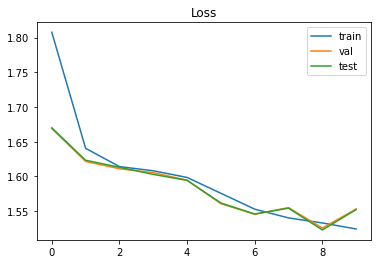

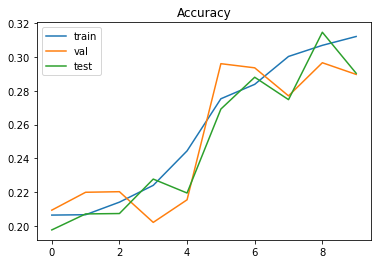

list of accuracy {'train': [0.20633600917431194, 0.20655103211009176, 0.21400516055045873, 0.2239678899082569, 0.24440366972477065, 0.27529529816513765, 0.28384747706422014, 0.30038130733944957, 0.3069667431192661, 0.3122161697247706], 'val': [0.20926339285714285, 0.21986607142857142, 0.22020089285714287, 0.20200892857142858, 0.21540178571428573, 0.29609375, 0.2936383928571429, 0.27700892857142856, 0.29665178571428574, 0.2897321428571429], 'test': [0.19754464285714285, 0.20703125, 0.20725446428571428, 0.22767857142857142, 0.21941964285714285, 0.26919642857142856, 0.28805803571428573, 0.2747767857142857, 0.31473214285714285, 0.2904017857142857]}
list of predictions tensor([[ 2.4097,  2.4984,  1.8438,  3.2070,  3.7776, -2.6965, -2.7113, -2.6326,
         -2.6849, -2.6761],
        [ 2.6821,  2.8077,  2.2664,  3.3721,  3.7540, -2.9110, -2.9393, -2.8356,
         -2.9280, -2.9059],
        [ 2.4316,  2.5318,  1.8722,  3.2739,  3.7806, -2.7267, -2.7315, -2.6624,
         -2.7102, -2.7044],


In [ ]:
# Train model
train(mymodel_1, loaders, optimizer, criterion, epochs=10, dev=dev)

In [ ]:
print(mymodel_1)

CNN_1(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): AdaptiveMaxPool2d(output_size=2)
    (11): Conv2d(512, 10, kernel_size=(2, 2), stride=(1, 1))
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=10, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=10, bias=True)
  )
)


In [ ]:
from torchsummary import summary

# summary(your_model, input_size=(channels, H, W))
summary(mymodel_1, (3,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 26, 26]           1,792
              ReLU-2           [-1, 64, 26, 26]               0
            Conv2d-3          [-1, 128, 24, 24]          73,856
              ReLU-4          [-1, 128, 24, 24]               0
         MaxPool2d-5          [-1, 128, 12, 12]               0
            Conv2d-6          [-1, 256, 10, 10]         295,168
              ReLU-7          [-1, 256, 10, 10]               0
         MaxPool2d-8            [-1, 256, 5, 5]               0
            Conv2d-9            [-1, 512, 3, 3]       1,180,160
             ReLU-10            [-1, 512, 3, 3]               0
AdaptiveMaxPool2d-11            [-1, 512, 2, 2]               0
           Conv2d-12             [-1, 10, 1, 1]          20,490
           Linear-13                 [-1, 1024]          11,264
             ReLU-14                 [-

In [ ]:
for name, param in mymodel_1.named_parameters():
    print(name, param.shape)

conv_layer.0.weight torch.Size([64, 3, 3, 3])
conv_layer.0.bias torch.Size([64])
conv_layer.2.weight torch.Size([128, 64, 3, 3])
conv_layer.2.bias torch.Size([128])
conv_layer.5.weight torch.Size([256, 128, 3, 3])
conv_layer.5.bias torch.Size([256])
conv_layer.8.weight torch.Size([512, 256, 3, 3])
conv_layer.8.bias torch.Size([512])
conv_layer.11.weight torch.Size([10, 512, 2, 2])
conv_layer.11.bias torch.Size([10])
fc_layers.0.weight torch.Size([1024, 10])
fc_layers.0.bias torch.Size([1024])
fc_layers.2.weight torch.Size([10, 1024])
fc_layers.2.bias torch.Size([10])


In [ ]:
# define a function for counting the parameters of a model
def count_parameters(mymodel_1):
    return sum(p.numel() for p in mymodel_1.parameters() )

In [ ]:
count_parameters(mymodel_1)

1592980

In [ ]:
class SimpleCNN_2(nn.Module):

  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        # Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 3
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.AdaptiveMaxPool2d(output_size=2),
        # Classifier
        nn.Conv2d(in_channels=256, out_channels=10, kernel_size=2, padding=0, stride=1)
    )

  # Forward
  def forward(self, x):
    #input is B x 1 x 28 x 28
    x = self.conv_layer(x)
    return x

In [ ]:
# Create the model
mymodel = SimpleCNN_2()
print(mymodel)

SimpleCNN_2(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): AdaptiveMaxPool2d(output_size=2)
    (8): Conv2d(256, 10, kernel_size=(2, 2), stride=(1, 1))
  )
)


In [ ]:
# Get an element from the dataset
test_x, _ = train_set[0] 

In [ ]:
# Get the size of a sample
test_x.size()

torch.Size([3, 28, 28])

In [ ]:
test_x = test_x.unsqueeze(dim=0)
test_x.size()

torch.Size([1, 3, 28, 28])

In [ ]:
output = mymodel(test_x)
output.shape

torch.Size([1, 10, 1, 1])

In [ ]:
out_features = output.size(1) * output.size(2) * output.size(3)
print(out_features)

10


In [ ]:
class CNN_2(nn.Module):
  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        # Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        # Layer 3
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.AdaptiveMaxPool2d(output_size=2),
        # Classifier
        nn.Conv2d(in_channels=256, out_channels=10, kernel_size=2, padding=0, stride=1)
    )
    
    # Create fully-connected layers
    self.fc_layers = nn.Sequential(
        # a first FC layer
        nn.Linear(10, 1024),
        nn.ReLU(),
        # the final Classification Layer
        nn.Linear(1024, 10)
     )
  # Forward
  def forward(self, x):
    x = self.conv_layer(x) 
    x = x.view(x.size(0), -1) 
    output = self.fc_layers(x)
    return output
       

In [ ]:
# Create the model
mymodel_2 = CNN_2()
print(mymodel_2)
output = mymodel_2(test_x)
output.shape

CNN_2(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): AdaptiveMaxPool2d(output_size=2)
    (8): Conv2d(256, 10, kernel_size=(2, 2), stride=(1, 1))
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=10, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=10, bias=True)
  )
)


torch.Size([1, 10])

In [ ]:
#Define an optimizier
import torch.optim as optim
optimizer = optim.SGD(mymodel_2.parameters(), lr = 0.01)
# Define a loss 
criterion = nn.CrossEntropyLoss()

In [ ]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
def train(net, loaders, optimizer, criterion, epochs=100, dev=torch.device("cuda"), save_param = False, model_name="my_model_2"):
    try:
        net = net.to(dev)
       
        
        # Initialize history
        history_loss = {"train": [], "val": [], "test": []}
        history_accuracy = {"train": [], "val": [], "test": []}
        # Store the best val accuracy
        best_val_accuracy = 0

        # Process each epoch
        for epoch in range(epochs):
            # Initialize epoch variables
            sum_loss = {"train": 0, "val": 0, "test": 0}
            sum_accuracy = {"train": 0, "val": 0, "test": 0}
            # Process each split
            for split in ["train", "val", "test"]:
                if split == "train":
                  net.train()
                else:
                  net.eval()
                # Process each batch
                for (input, labels) in tqdm(loaders[split],desc=split):
                    # Move to CUDA
                    input = input.to(dev)
                    labels = labels.to(dev)
                    # Reset gradients
                    optimizer.zero_grad()
                    # Compute output
                    pred = net(input)
                    loss = criterion(pred, labels)
                    # Update loss
                    sum_loss[split] += loss.item()
                    # Check parameter update
                    if split == "train":
                        # Compute gradients
                        loss.backward()
                        # Optimize
                        optimizer.step()
                    # Compute accuracy
                    _,pred_labels = pred.max(1)
                    batch_accuracy = (pred_labels == labels).sum().item()/input.size(0)
                    # Update accuracy
                    sum_accuracy[split] += batch_accuracy
            # Compute epoch loss/accuracy
            epoch_loss = {split: sum_loss[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            epoch_accuracy = {split: sum_accuracy[split]/len(loaders[split]) for split in ["train", "val", "test"]}

            # Store params at the best validation accuracy
            if save_param and epoch_accuracy["val"] > best_val_accuracy:
              #torch.save(net.state_dict(), f"{net.__class__.__name__}_best_val.pth")
              torch.save(net.state_dict(), f"{model_name}_best_val.pth")
              best_val_accuracy = epoch_accuracy["val"]

            # Update history
            for split in ["train", "val", "test"]:
                history_loss[split].append(epoch_loss[split])
                history_accuracy[split].append(epoch_accuracy[split])
            # Print info
            print(f"Epoch {epoch+1}:",
                  f"TrL={epoch_loss['train']:.4f},",
                  f"TrA={epoch_accuracy['train']:.4f},",
                  f"VL={epoch_loss['val']:.4f},",
                  f"VA={epoch_accuracy['val']:.4f},",
                  f"TeL={epoch_loss['test']:.4f},",
                  f"TeA={epoch_accuracy['test']:.4f},")
    except KeyboardInterrupt:
        print("Interrupted")
    finally:
        # Plot loss
        plt.title("Loss")
        for split in ["train", "val", "test"]:
            plt.plot(history_loss[split], label=split)
        plt.legend()
        plt.show()
        # Plot accuracy
        plt.title("Accuracy")
        for split in ["train", "val", "test"]:
            plt.plot(history_accuracy[split], label=split)
        plt.legend()
        plt.show()
        print('list of accuracy',history_accuracy)
        print('list of predictions',pred)
        #plt.plot('neurnet',net)
        #print('Neural network',net)

In [ ]:
# Define dictionary of loaders
loaders = {"train": train_loader,   
           "val": val_loader,
           "test": test_loader}

train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 1: TrL=1.7192, TrA=0.2146, VL=1.6444, VA=0.2145, TeL=1.6324, TeA=0.2333,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 2: TrL=1.6156, TrA=0.2209, VL=1.6193, VA=0.2279, TeL=1.6114, TeA=0.2280,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 3: TrL=1.6020, TrA=0.2376, VL=1.5991, VA=0.2193, TeL=1.5916, TeA=0.2564,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 4: TrL=1.5764, TrA=0.2718, VL=1.5719, VA=0.2779, TeL=1.5684, TeA=0.2853,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 5: TrL=1.5546, TrA=0.2830, VL=1.5460, VA=0.2896, TeL=1.5379, TeA=0.3049,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 6: TrL=1.5366, TrA=0.2975, VL=1.5470, VA=0.3041, TeL=1.5456, TeA=0.2843,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 7: TrL=1.5258, TrA=0.3088, VL=1.5190, VA=0.3113, TeL=1.5167, TeA=0.3051,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 8: TrL=1.5138, TrA=0.3215, VL=1.5406, VA=0.3089, TeL=1.5382, TeA=0.3032,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 9: TrL=1.5024, TrA=0.3343, VL=1.5028, VA=0.3199, TeL=1.4916, TeA=0.3234,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 10: TrL=1.4903, TrA=0.3388, VL=1.5369, VA=0.3269, TeL=1.5275, TeA=0.3335,


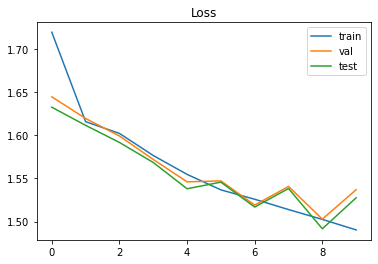

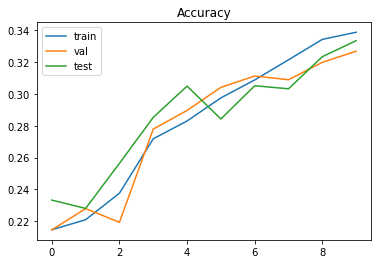

list of accuracy {'train': [0.21458715596330274, 0.22091743119266052, 0.23759461009174312, 0.2717918577981651, 0.2830045871559633, 0.2975143348623853, 0.3087987385321101, 0.32146215596330274, 0.3343004587155963, 0.3387901376146789], 'val': [0.21450892857142856, 0.2279017857142857, 0.21930803571428573, 0.2779017857142857, 0.2896205357142857, 0.3041294642857143, 0.3112723214285714, 0.30892857142857144, 0.31986607142857143, 0.3268973214285714], 'test': [0.23325892857142858, 0.22801339285714287, 0.2563616071428571, 0.28526785714285713, 0.30491071428571426, 0.28426339285714286, 0.30513392857142857, 0.3032366071428571, 0.3234375, 0.3334821428571429]}
list of predictions tensor([[ 3.5224,  3.3639,  2.6679,  4.6025,  4.8568, -3.6084, -3.5957, -3.6216,
         -3.4755, -3.7112],
        [ 3.5471,  3.4586,  2.1883,  4.6318,  3.8847, -3.4135, -3.3232, -3.3405,
         -3.3056, -3.4025],
        [ 3.5112,  3.3455,  2.2982,  4.8630,  4.7219, -3.5582, -3.5036, -3.5167,
         -3.4115, -3.6134],


In [ ]:
# Train model
train(mymodel_2, loaders, optimizer, criterion, epochs=10, dev=dev)

In [ ]:
print(mymodel_2)

CNN_2(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): AdaptiveMaxPool2d(output_size=2)
    (8): Conv2d(256, 10, kernel_size=(2, 2), stride=(1, 1))
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=10, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=10, bias=True)
  )
)


In [ ]:
from torchsummary import summary

# summary(your_model, input_size=(channels, H, W))
summary(mymodel_2, (3,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 26, 26]           1,792
              ReLU-2           [-1, 64, 26, 26]               0
            Conv2d-3          [-1, 128, 24, 24]          73,856
              ReLU-4          [-1, 128, 24, 24]               0
         MaxPool2d-5          [-1, 128, 12, 12]               0
            Conv2d-6          [-1, 256, 10, 10]         295,168
              ReLU-7          [-1, 256, 10, 10]               0
 AdaptiveMaxPool2d-8            [-1, 256, 2, 2]               0
            Conv2d-9             [-1, 10, 1, 1]          10,250
           Linear-10                 [-1, 1024]          11,264
             ReLU-11                 [-1, 1024]               0
           Linear-12                   [-1, 10]          10,250
Total params: 402,580
Trainable params: 402,580
Non-trainable params: 0
-------------------------------

In [ ]:
for name, param in mymodel_2.named_parameters():
    print(name, param.shape)

conv_layer.0.weight torch.Size([64, 3, 3, 3])
conv_layer.0.bias torch.Size([64])
conv_layer.2.weight torch.Size([128, 64, 3, 3])
conv_layer.2.bias torch.Size([128])
conv_layer.5.weight torch.Size([256, 128, 3, 3])
conv_layer.5.bias torch.Size([256])
conv_layer.8.weight torch.Size([10, 256, 2, 2])
conv_layer.8.bias torch.Size([10])
fc_layers.0.weight torch.Size([1024, 10])
fc_layers.0.bias torch.Size([1024])
fc_layers.2.weight torch.Size([10, 1024])
fc_layers.2.bias torch.Size([10])


In [ ]:
# define a function for counting the parameters of a model
def count_parameters(mymodel_2):
    return sum(p.numel() for p in mymodel_0.parameters() )

In [ ]:
count_parameters(mymodel_2)

1855636

In [ ]:
class SimpleCNN_3(nn.Module):

  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        # Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.AdaptiveMaxPool2d(output_size=2),
        # Classifier
        nn.Conv2d(in_channels=128, out_channels=10, kernel_size=2, padding=0, stride=1)
    )

  # Forward
  def forward(self, x):
    #input is B x 1 x 28 x 28
    x = self.conv_layer(x)
    return x

In [ ]:
# Create the model
mymodel = SimpleCNN_3()
print(mymodel)

SimpleCNN_3(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): AdaptiveMaxPool2d(output_size=2)
    (5): Conv2d(128, 10, kernel_size=(2, 2), stride=(1, 1))
  )
)


In [ ]:
# Get an element from the dataset
test_x, _ = train_set[0] 

In [ ]:
# Get the size of a sample
test_x.size()

torch.Size([3, 28, 28])

In [ ]:
test_x = test_x.unsqueeze(dim=0)
test_x.size()

torch.Size([1, 3, 28, 28])

In [ ]:
output = mymodel(test_x)
output.shape

torch.Size([1, 10, 1, 1])

In [ ]:
out_features = output.size(1) * output.size(2) * output.size(3)
print(out_features)

10


In [ ]:
class CNN_3(nn.Module):
  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, padding=0, stride=1),
        nn.ReLU(),
        # Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.AdaptiveMaxPool2d(output_size=2),
        # Classifier
        nn.Conv2d(in_channels=128, out_channels=10, kernel_size=2, padding=0, stride=1)
    )
    
    # Create fully-connected layers
    self.fc_layers = nn.Sequential(
        # a first FC layer
        nn.Linear(10, 1024), 
        nn.ReLU(),
        # the final Classification Layer
        nn.Linear(1024, 10)
     )
  # Forward
  def forward(self, x):
    x = self.conv_layer(x) 
    x = x.view(x.size(0), -1) 
    output = self.fc_layers(x) 
    return output
       

In [ ]:
# Create the model
mymodel_3 = CNN_3()
print(mymodel_3)
output = mymodel_3(test_x)
output.shape

CNN_3(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): AdaptiveMaxPool2d(output_size=2)
    (5): Conv2d(128, 10, kernel_size=(2, 2), stride=(1, 1))
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=10, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=10, bias=True)
  )
)


torch.Size([1, 10])

In [ ]:
#Define an optimizier
import torch.optim as optim
optimizer = optim.SGD(mymodel_3.parameters(), lr = 0.01)
# Define a loss 
criterion = nn.CrossEntropyLoss()

In [ ]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
def train(net, loaders, optimizer, criterion, epochs=100, dev=torch.device("cuda"), save_param = False, model_name="my_model_3"):
    try:
        net = net.to(dev)
       
        
        # Initialize history
        history_loss = {"train": [], "val": [], "test": []}
        history_accuracy = {"train": [], "val": [], "test": []}
        # Store the best val accuracy
        best_val_accuracy = 0

        # Process each epoch
        for epoch in range(epochs):
            # Initialize epoch variables
            sum_loss = {"train": 0, "val": 0, "test": 0}
            sum_accuracy = {"train": 0, "val": 0, "test": 0}
            # Process each split
            for split in ["train", "val", "test"]:
                if split == "train":
                  net.train()
                else:
                  net.eval()
                # Process each batch
                for (input, labels) in tqdm(loaders[split],desc=split):
                    # Move to CUDA
                    input = input.to(dev)
                    labels = labels.to(dev)
                    # Reset gradients
                    optimizer.zero_grad()
                    # Compute output
                    pred = net(input)
                    loss = criterion(pred, labels)
                    # Update loss
                    sum_loss[split] += loss.item()
                    # Check parameter update
                    if split == "train":
                        # Compute gradients
                        loss.backward()
                        # Optimize
                        optimizer.step()
                    # Compute accuracy
                    _,pred_labels = pred.max(1)
                    batch_accuracy = (pred_labels == labels).sum().item()/input.size(0)
                    # Update accuracy
                    sum_accuracy[split] += batch_accuracy
            # Compute epoch loss/accuracy
            epoch_loss = {split: sum_loss[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            epoch_accuracy = {split: sum_accuracy[split]/len(loaders[split]) for split in ["train", "val", "test"]}

            # Store params at the best validation accuracy
            if save_param and epoch_accuracy["val"] > best_val_accuracy:
              #torch.save(net.state_dict(), f"{net.__class__.__name__}_best_val.pth")
              torch.save(net.state_dict(), f"{model_name}_best_val.pth")
              best_val_accuracy = epoch_accuracy["val"]

            # Update history
            for split in ["train", "val", "test"]:
                history_loss[split].append(epoch_loss[split])
                history_accuracy[split].append(epoch_accuracy[split])
            # Print info
            print(f"Epoch {epoch+1}:",
                  f"TrL={epoch_loss['train']:.4f},",
                  f"TrA={epoch_accuracy['train']:.4f},",
                  f"VL={epoch_loss['val']:.4f},",
                  f"VA={epoch_accuracy['val']:.4f},",
                  f"TeL={epoch_loss['test']:.4f},",
                  f"TeA={epoch_accuracy['test']:.4f},")
    except KeyboardInterrupt:
        print("Interrupted")
    finally:
        # Plot loss
        plt.title("Loss")
        for split in ["train", "val", "test"]:
            plt.plot(history_loss[split], label=split)
        plt.legend()
        plt.show()
        # Plot accuracy
        plt.title("Accuracy")
        for split in ["train", "val", "test"]:
            plt.plot(history_accuracy[split], label=split)
        plt.legend()
        plt.show()
        print('list of accuracy',history_accuracy)
        print('list of predictions',pred)
        #plt.plot('neurnet',net)
        #print('Neural network',net)

In [ ]:
# Define dictionary of loaders
loaders = {"train": train_loader,   
           "val": val_loader,
           "test": test_loader}

train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 1: TrL=1.6951, TrA=0.2095, VL=1.6268, VA=0.1807, TeL=1.6250, TeA=0.1773,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 2: TrL=1.6017, TrA=0.2420, VL=1.6028, VA=0.2490, TeL=1.6061, TeA=0.2368,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 3: TrL=1.5690, TrA=0.2732, VL=1.5661, VA=0.2528, TeL=1.5565, TeA=0.2873,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 4: TrL=1.5482, TrA=0.2894, VL=1.5377, VA=0.2919, TeL=1.5278, TeA=0.3083,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 5: TrL=1.5295, TrA=0.3028, VL=1.5238, VA=0.3114, TeL=1.5204, TeA=0.2904,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 6: TrL=1.5188, TrA=0.3140, VL=1.5085, VA=0.3249, TeL=1.5051, TeA=0.3107,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 7: TrL=1.5042, TrA=0.3233, VL=1.5054, VA=0.3285, TeL=1.5004, TeA=0.3163,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 8: TrL=1.4912, TrA=0.3352, VL=1.4855, VA=0.3394, TeL=1.4717, TeA=0.3474,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 9: TrL=1.4769, TrA=0.3446, VL=1.4786, VA=0.3378, TeL=1.4696, TeA=0.3338,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 10: TrL=1.4619, TrA=0.3576, VL=1.4543, VA=0.3533, TeL=1.4406, TeA=0.3757,


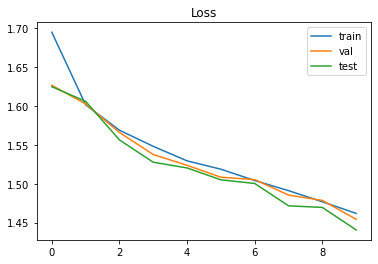

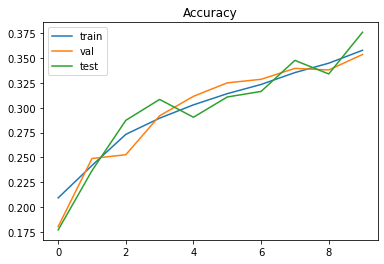

list of accuracy {'train': [0.20948967889908257, 0.24199827981651378, 0.2732167431192661, 0.2894466743119266, 0.3028182339449541, 0.3140481651376147, 0.3232769495412844, 0.33518348623853206, 0.34461295871559633, 0.35758600917431194], 'val': [0.1806919642857143, 0.2489955357142857, 0.25279017857142855, 0.29185267857142855, 0.31138392857142855, 0.3248883928571429, 0.32845982142857144, 0.33939732142857143, 0.3378348214285714, 0.35334821428571433], 'test': [0.17734375, 0.23683035714285713, 0.28727678571428567, 0.30825892857142856, 0.2904017857142857, 0.31071428571428567, 0.3162946428571428, 0.34743303571428574, 0.33381696428571433, 0.3756696428571429]}
list of predictions tensor([[ 3.3085,  3.2242,  3.2372,  3.8539,  4.1152, -3.3415, -3.3531, -3.3434,
         -3.3528, -3.4723],
        [ 3.5840,  3.5335,  2.7550,  4.4443,  3.0539, -3.2989, -3.2676, -3.2322,
         -3.3378, -3.3871],
        [ 2.9402,  2.7311,  2.1942,  4.0633,  4.1116, -3.0284, -3.0190, -2.9878,
         -3.0413, -3.163

In [ ]:
# Train model
train(mymodel_3, loaders, optimizer, criterion, epochs=10, dev=dev)

In [ ]:
print(mymodel_3)

CNN_3(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): AdaptiveMaxPool2d(output_size=2)
    (5): Conv2d(128, 10, kernel_size=(2, 2), stride=(1, 1))
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=10, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=10, bias=True)
  )
)


In [ ]:
from torchsummary import summary

# summary(your_model, input_size=(channels, H, W))
summary(mymodel_3, (3,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 24, 24]           4,864
              ReLU-2           [-1, 64, 24, 24]               0
            Conv2d-3          [-1, 128, 22, 22]          73,856
              ReLU-4          [-1, 128, 22, 22]               0
 AdaptiveMaxPool2d-5            [-1, 128, 2, 2]               0
            Conv2d-6             [-1, 10, 1, 1]           5,130
            Linear-7                 [-1, 1024]          11,264
              ReLU-8                 [-1, 1024]               0
            Linear-9                   [-1, 10]          10,250
Total params: 105,364
Trainable params: 105,364
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 1.53
Params size (MB): 0.40
Estimated Total Size (MB): 1.94
-------------------------------------------

In [ ]:
for name, param in mymodel_3.named_parameters():
    print(name, param.shape)

conv_layer.0.weight torch.Size([64, 3, 5, 5])
conv_layer.0.bias torch.Size([64])
conv_layer.2.weight torch.Size([128, 64, 3, 3])
conv_layer.2.bias torch.Size([128])
conv_layer.5.weight torch.Size([10, 128, 2, 2])
conv_layer.5.bias torch.Size([10])
fc_layers.0.weight torch.Size([1024, 10])
fc_layers.0.bias torch.Size([1024])
fc_layers.2.weight torch.Size([10, 1024])
fc_layers.2.bias torch.Size([10])


In [ ]:
# define a function for counting the parameters of a model
def count_parameters(mymodel_3):
    return sum(p.numel() for p in mymodel_3.parameters() )

In [ ]:
count_parameters(mymodel_3)

105364

In [ ]:
class SimpleCNN_4(nn.Module):

  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.AdaptiveMaxPool2d(output_size=2),
        # Classifier
        nn.Conv2d(in_channels=64, out_channels=10, kernel_size=2, padding=0, stride=1)
    )

  # Forward
  def forward(self, x):
    #input is B x 1 x 28 x 28
    x = self.conv_layer(x)
    return x

In [ ]:
# Create the model
mymodel = SimpleCNN_4()
print(mymodel)

SimpleCNN_4(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): AdaptiveMaxPool2d(output_size=2)
    (3): Conv2d(64, 10, kernel_size=(2, 2), stride=(1, 1))
  )
)


In [ ]:
# Get an element from the dataset
test_x, _ = train_set[0] 

In [ ]:
# Get the size of a sample
test_x.size()

torch.Size([3, 28, 28])

In [ ]:
test_x = test_x.unsqueeze(dim=0)
test_x.size()

torch.Size([1, 3, 28, 28])

In [ ]:
output = mymodel(test_x)
output.shape

torch.Size([1, 10, 1, 1])

In [ ]:
out_features = output.size(1) * output.size(2) * output.size(3)
print(out_features)

10


In [ ]:
class CNN_4(nn.Module):
  #Constructor
  def __init__(self):
    # Call parent contructor
    super().__init__()
    self.conv_layer = nn.Sequential(
        # Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=0, stride=1),
        nn.ReLU(),
        nn.AdaptiveMaxPool2d(output_size=2),
        # Classifier
        nn.Conv2d(in_channels=64, out_channels=10, kernel_size=2, padding=0, stride=1)
    )
    
    # Create fully-connected layers
    self.fc_layers = nn.Sequential(
        # a first FC layer
        nn.Linear(10, 1024), 
        nn.ReLU(),
        # the final Classification Layer
        nn.Linear(1024, 10)
     )
  # Forward
  def forward(self, x):
    x = self.conv_layer(x) 
    x = x.view(x.size(0), -1) 
    output = self.fc_layers(x) 
    return output
       

In [ ]:
# Create the model
mymodel_4 = CNN_4()
print(mymodel_4)
output = mymodel_4(test_x)
output.shape

CNN_4(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): AdaptiveMaxPool2d(output_size=2)
    (3): Conv2d(64, 10, kernel_size=(2, 2), stride=(1, 1))
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=10, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=10, bias=True)
  )
)


torch.Size([1, 10])

In [ ]:
#Define an optimizier
import torch.optim as optim
optimizer = optim.SGD(mymodel_4.parameters(), lr = 0.01)
# Define a loss 
criterion = nn.CrossEntropyLoss()

In [ ]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
def train(net, loaders, optimizer, criterion, epochs=100, dev=torch.device("cuda"), save_param = False, model_name="my_model_4"):
    try:
        net = net.to(dev)
       
        
        # Initialize history
        history_loss = {"train": [], "val": [], "test": []}
        history_accuracy = {"train": [], "val": [], "test": []}
        # Store the best val accuracy
        best_val_accuracy = 0

        # Process each epoch
        for epoch in range(epochs):
            # Initialize epoch variables
            sum_loss = {"train": 0, "val": 0, "test": 0}
            sum_accuracy = {"train": 0, "val": 0, "test": 0}
            # Process each split
            for split in ["train", "val", "test"]:
                if split == "train":
                  net.train()
                else:
                  net.eval()
                # Process each batch
                for (input, labels) in tqdm(loaders[split],desc=split):
                    # Move to CUDA
                    input = input.to(dev)
                    labels = labels.to(dev)
                    # Reset gradients
                    optimizer.zero_grad()
                    # Compute output
                    pred = net(input)
                    loss = criterion(pred, labels)
                    # Update loss
                    sum_loss[split] += loss.item()
                    # Check parameter update
                    if split == "train":
                        # Compute gradients
                        loss.backward()
                        # Optimize
                        optimizer.step()
                    # Compute accuracy
                    _,pred_labels = pred.max(1)
                    batch_accuracy = (pred_labels == labels).sum().item()/input.size(0)
                    # Update accuracy
                    sum_accuracy[split] += batch_accuracy
            # Compute epoch loss/accuracy
            epoch_loss = {split: sum_loss[split]/len(loaders[split]) for split in ["train", "val", "test"]}
            epoch_accuracy = {split: sum_accuracy[split]/len(loaders[split]) for split in ["train", "val", "test"]}

            # Store params at the best validation accuracy
            if save_param and epoch_accuracy["val"] > best_val_accuracy:
              #torch.save(net.state_dict(), f"{net.__class__.__name__}_best_val.pth")
              torch.save(net.state_dict(), f"{model_name}_best_val.pth")
              best_val_accuracy = epoch_accuracy["val"]

            # Update history
            for split in ["train", "val", "test"]:
                history_loss[split].append(epoch_loss[split])
                history_accuracy[split].append(epoch_accuracy[split])
            # Print info
            print(f"Epoch {epoch+1}:",
                  f"TrL={epoch_loss['train']:.4f},",
                  f"TrA={epoch_accuracy['train']:.4f},",
                  f"VL={epoch_loss['val']:.4f},",
                  f"VA={epoch_accuracy['val']:.4f},",
                  f"TeL={epoch_loss['test']:.4f},",
                  f"TeA={epoch_accuracy['test']:.4f},")
    except KeyboardInterrupt:
        print("Interrupted")
    finally:
        # Plot loss
        plt.title("Loss")
        for split in ["train", "val", "test"]:
            plt.plot(history_loss[split], label=split)
        plt.legend()
        plt.show()
        # Plot accuracy
        plt.title("Accuracy")
        for split in ["train", "val", "test"]:
            plt.plot(history_accuracy[split], label=split)
        plt.legend()
        plt.show()
        print('list of accuracy',history_accuracy)
        print('list of predictions',pred)
        #plt.plot('neurnet',net)
        #print('Neural network',net)

In [ ]:
# Define dictionary of loaders
loaders = {"train": train_loader,   
           "val": val_loader,
           "test": test_loader}

train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 1: TrL=1.6633, TrA=0.2390, VL=1.6113, VA=0.2104, TeL=1.6026, TeA=0.2183,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 2: TrL=1.5673, TrA=0.2795, VL=1.5847, VA=0.2687, TeL=1.5803, TeA=0.2485,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 3: TrL=1.5487, TrA=0.2908, VL=1.5461, VA=0.2979, TeL=1.5437, TeA=0.2792,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 4: TrL=1.5381, TrA=0.3033, VL=1.5339, VA=0.3039, TeL=1.5304, TeA=0.2831,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 5: TrL=1.5279, TrA=0.3091, VL=1.5325, VA=0.3033, TeL=1.5271, TeA=0.2939,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 6: TrL=1.5203, TrA=0.3147, VL=1.5246, VA=0.3001, TeL=1.5274, TeA=0.3055,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 7: TrL=1.5084, TrA=0.3225, VL=1.6282, VA=0.2641, TeL=1.6341, TeA=0.2491,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 8: TrL=1.4965, TrA=0.3291, VL=1.4940, VA=0.3452, TeL=1.4967, TeA=0.3182,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 9: TrL=1.4871, TrA=0.3405, VL=1.4879, VA=0.3331, TeL=1.4911, TeA=0.3129,


train:   0%|          | 0/218 [00:00<?, ?it/s]

val:   0%|          | 0/28 [00:00<?, ?it/s]

test:   0%|          | 0/28 [00:00<?, ?it/s]

Epoch 10: TrL=1.4778, TrA=0.3390, VL=1.4925, VA=0.3425, TeL=1.4897, TeA=0.3436,


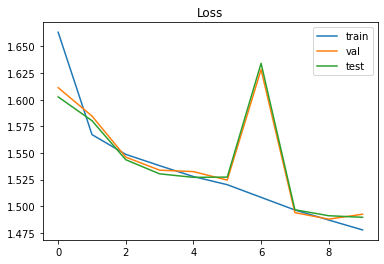

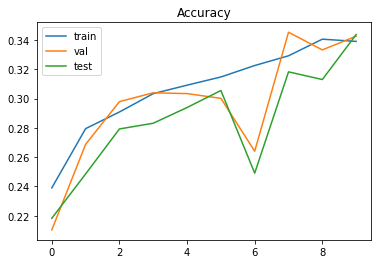

list of accuracy {'train': [0.23904529816513762, 0.2794524082568807, 0.2908170871559633, 0.3033285550458716, 0.30910263761467893, 0.31469323394495413, 0.3224971330275229, 0.3291399082568807, 0.3404787844036697, 0.3389506880733945], 'val': [0.21037946428571427, 0.26875, 0.29787946428571427, 0.30390625, 0.3033482142857143, 0.3001116071428571, 0.2640625, 0.3452008928571429, 0.33314732142857145, 0.3425223214285714], 'test': [0.21830357142857143, 0.24854910714285713, 0.2792410714285714, 0.2831473214285714, 0.29386160714285714, 0.30546875, 0.24910714285714283, 0.31819196428571433, 0.31294642857142857, 0.3436383928571428]}
list of predictions tensor([[ 2.3904,  2.6861,  2.5834,  3.4102,  4.4720, -3.2029, -3.1854, -3.1952,
         -3.1528, -3.2549],
        [ 2.8738,  2.9984,  2.5384,  3.8685,  3.8245, -3.3222, -3.3163, -3.3071,
         -3.3162, -3.3445],
        [ 2.0769,  2.2499,  1.9754,  3.4673,  4.2317, -2.8553, -2.8618, -2.8476,
         -2.8763, -2.9255],
        [ 2.5025,  2.7635,  2

In [ ]:
# Train model
train(mymodel_4, loaders, optimizer, criterion, epochs=10, dev=dev)

In [ ]:
print(mymodel_4)

CNN_4(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): AdaptiveMaxPool2d(output_size=2)
    (3): Conv2d(64, 10, kernel_size=(2, 2), stride=(1, 1))
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=10, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=10, bias=True)
  )
)


In [ ]:
from torchsummary import summary

# summary(your_model, input_size=(channels, H, W))
summary(mymodel_4, (3,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 26, 26]           1,792
              ReLU-2           [-1, 64, 26, 26]               0
 AdaptiveMaxPool2d-3             [-1, 64, 2, 2]               0
            Conv2d-4             [-1, 10, 1, 1]           2,570
            Linear-5                 [-1, 1024]          11,264
              ReLU-6                 [-1, 1024]               0
            Linear-7                   [-1, 10]          10,250
Total params: 25,876
Trainable params: 25,876
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.68
Params size (MB): 0.10
Estimated Total Size (MB): 0.79
----------------------------------------------------------------


In [ ]:
for name, param in mymodel_4.named_parameters():
    print(name, param.shape)

conv_layer.0.weight torch.Size([64, 3, 3, 3])
conv_layer.0.bias torch.Size([64])
conv_layer.3.weight torch.Size([10, 64, 2, 2])
conv_layer.3.bias torch.Size([10])
fc_layers.0.weight torch.Size([1024, 10])
fc_layers.0.bias torch.Size([1024])
fc_layers.2.weight torch.Size([10, 1024])
fc_layers.2.bias torch.Size([10])


In [ ]:
# define a function for counting the parameters of a model
def count_parameters(mymodel_4):
    return sum(p.numel() for p in mymodel_4.parameters() )

In [ ]:
count_parameters(mymodel_4)

25876

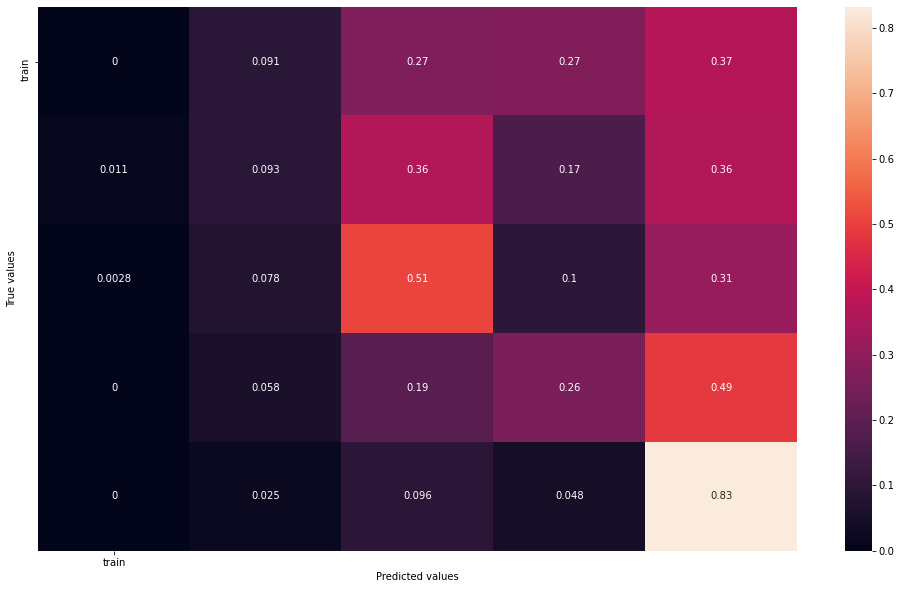

In [ ]:
#confusion matrix of the last model
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
import os
import numpy as np
y_pred = []
y_true = []

# iterate over test data
for inputs, labels in test_loader:
  inputs, labels = inputs.cuda(), labels.cuda()
  output = mymodel_4(inputs) # Feed Network
  output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
  y_pred.extend(output) # Save Prediction
  
  labels = labels.data.cpu().numpy()
  y_true.extend(labels) # Save Truth

# constant for classes
classes = os.listdir(root_dir)

# Build confusion matrix
cm = confusion_matrix(y_true, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(17,10))
sns.heatmap(cmn, annot=True, xticklabels=classes, yticklabels=classes)
plt.ylabel('True values')
plt.xlabel('Predicted values')
plt.show(block=False)

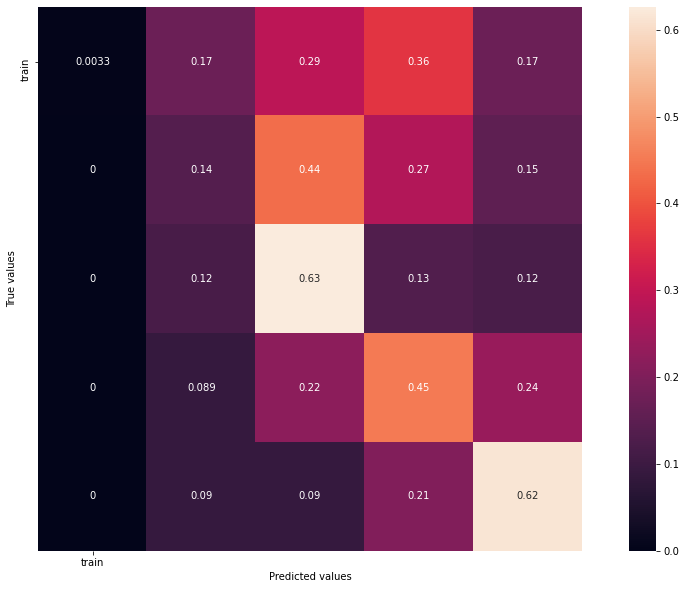

In [ ]:
#confusion matrix of the best model
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
import os
import numpy as np
y_pred = []
y_true = []

# iterate over test data
for inputs, labels in test_loader:
  inputs, labels = inputs.cuda(), labels.cuda()
  output = mymodel_3(inputs) # Feed Network
  output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
  y_pred.extend(output) # Save Prediction
  
  labels = labels.data.cpu().numpy()
  y_true.extend(labels) # Save Truth

# constant for classes
classes = os.listdir(root_dir)

# Build confusion matrix
cm = confusion_matrix(y_true, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(17,10))
sns.heatmap(cmn, square=True, annot=True, xticklabels=classes, yticklabels=classes)
plt.ylabel('True values')
plt.xlabel('Predicted values')
plt.show(block=False)